# DSC 530 Data Exploration and Analysis 
# Weeks 9 & 10 Coding Assignment
# Due: 2025-11-17

This set of exercises gives you the opportunity to apply the three techniques covered in the unit. You have the flexibility to choose any Python modules or packages for the coding tasks. To check the accuracy of your outputs, you can refer to the textbook solution file. Keep in mind that different functions may produce slightly different results due to variations in the algorithms used. Therefore, it's important to include explanations in your code and interpret your results based on the specific method you've applied. You will not be penalized if your documentation clearly justifies and explains the functions you select for each task.

Setup your assignment notebook with access to the Chapter 9 data files from Hands-on data analysis with Pandas (Molin, 2021) and use Jupyter Lab/Notebook to complete the following problems:

## Chapter 9 in Hands-On Data Analysis with Pandas (Molin, 2021) - Getting Started with Machine Learning in Python

- [x] ~~Exercise 1(a, c-e)~~ Completed: 2025-11-09
- [x] ~~Exercise 2(a-e)~~ Completed: 2025-11-09
- [x] ~~Exercise 3(a-e)~~ Completed: 2025-11-10

Practice building and evaluating machine learning models in scikit-learn with the following exercises:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Exercise 1: Clustering Model

a. Combine the red and white wine datasets (data/winequality-red.csv and data/winequality-white.csv, respectively) and add a column for the kind of wine (red or white).

In [2]:
import pandas as pd

wine_red = pd.read_csv('data/winequality-red.csv')
wine_white = pd.read_csv('data/winequality-white.csv', sep=';')
wine = pd.concat([
    wine_red.assign(kind = 'red'), 
    wine_white.assign(kind = 'white')
])

wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


c. Build and fit a pipeline that scales the data and then uses k-means clustering to make two clusters. Be sure not to use the quality column.

In [ ]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = wine.drop(columns=['quality', 'kind'])

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('cluster', KMeans(n_clusters=2, random_state=0))
])

y_pred = pipe.fit(X) # figure out dependent and independent variable naming conventions for training, test, and predictive models.

d. Use the Fowlkes-Mallows Index (the fowlkes_mallows_score() function is in sklearn.metrics) to evaluate how well k-means is able to make the distinction between red and white wine.

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import fowlkes_mallows_score

y = np.where(wine.kind == 'red', 1, 0)
X = wine.drop(columns=['quality', 'kind'])
y_pred = pipe.predict(X)

fowlkes_mallows_score(y, y_pred)

0.5882880690408546

e. Find the center of each cluster.

In [5]:
pipe.fit(X)
centers = pipe.named_steps['cluster'].cluster_centers_
print(centers)

[[ 0.10614073  0.19204416 -0.12013631 -0.54024683  0.05944484 -0.42325676
  -0.46043429 -0.31350349  0.17999954  0.15065775  0.34365838]
 [-0.20903127 -0.37820763  0.23659385  1.06395044 -0.11706938  0.83355273
   0.90676936  0.617407   -0.35448721 -0.29670212 -0.67679341]]


### Exercise 2: Predict star temperature

a. Using the data/stars.csv file, perform some initial EDA and then build a linear regression model of all the numeric columns to predict the temperature of the star.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
stars = pd.read_csv('data/stars.csv')
stars = stars.drop(columns = ['name', 'spectraltype']).dropna()

fig = plt.figure(figsize = (7, 7))
sns.heatmap(
    stars.corr(),
    center = 0,
    square = True,
    annot = True,
    colors = "coolwarm"
)

b. Train the model on 75% of the initial data.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = stars.dropna()
X = data.drop(columns = ['temperature']).dropna()
y = data.temperature

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0
)

lm = LinearRegression()
model = lm.fit(X_train, y_train)
pred = model.predict(X_test)

c. Calculate the R2 and RMSE of the model.

In [8]:
from sklearn.metrics import mean_squared_error 

r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("R2 = ", round(r2, 2))
print("RMSE = ", round(rmse,2))

R2 =  0.91
RMSE =  241.51


d. Find the coefficients for each regressor and the intercept of the linear regression equation.

In [9]:
model.intercept_
[(col, coef) for col, coef in zip(X_train.columns, model.coef_)]

[('magJ', np.float64(-1104.8873860002388)),
 ('radius', np.float64(3.332940126238782)),
 ('magB', np.float64(-273.81954863554074)),
 ('magV', np.float64(-221.01848268672066)),
 ('magK', np.float64(1638.7527714594426)),
 ('mass', np.float64(246.6886778332304)),
 ('metallicity', np.float64(3.1073967118654875)),
 ('magH', np.float64(-2.9577965758900575)),
 ('planets', np.float64(-25.783565829298443))]

$$temperature = 6654.764 - 1104.887 \times magJ + 3.333 \times radius - 273.820 \times magB - 221.018 \times magV + 1638.753 \times magK + 246.689 \times mass + 3.107 \times metallicity - 2.958 \times magH - 25.784 \times planets$$

e. Visualize the residuals using the plot_residuals() function from the ml_utils.regression module.

array([<Axes: xlabel='Observation', ylabel='Residual'>,
       <Axes: xlabel='Residual', ylabel='Density'>], dtype=object)

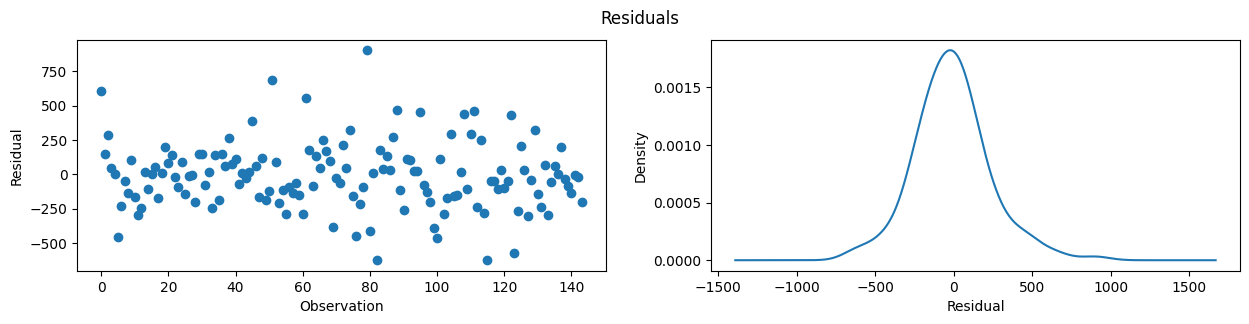

In [10]:
def plot_residuals(y_test, pred):
    residuals = y_test - pred
    fig, axes = plt.subplots(1, 2, figsize = (15, 3))
    axes[0].scatter(np.arange(residuals.shape[0]), residuals)
    axes[0].set_xlabel('Observation')
    axes[0].set_ylabel('Residual')
    residuals.plot(kind='kde', ax=axes[1])
    axes[1].set_xlabel('Residual')
    plt.suptitle('Residuals')
    return axes

plot_residuals(y_test, pred)

---
### Exercise 3: Classify planets that have shorter years than Earth

a. Using the data/planets.csv file, build a logistic regression model with the eccentricity, semimajoraxis, and mass columns as regressors. You will need to make a new column to use for the y (year shorter than Earth).

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

planets = pd.read_csv('data/planets.csv').dropna()

X = planets[['eccentricity', 'semimajoraxis', 'mass']]
y = np.where(planets.period < 365, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0, stratify = y
)

shorter_than_Earth = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(
        solver = 'lbfgs', random_state = 0))
]).fit(X_train, y_train)

pred = shorter_than_Earth.predict(X_test)

b. Find the accuracy score.

In [12]:
from sklearn.metrics import accuracy_score
pred = shorter_than_Earth.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy score = ", round(acc, 2))

Accuracy score =  0.91


c. Use the classification_report() function from scikit-learn to see the precision, recall, and F1 score for each class.

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.82      0.90      0.86        10

    accuracy                           0.91        33
   macro avg       0.89      0.91      0.90        33
weighted avg       0.91      0.91      0.91        33



d. With the plot_roc() function from the ml_utils.classification module, plot the ROC curve.

<Axes: title={'center': 'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

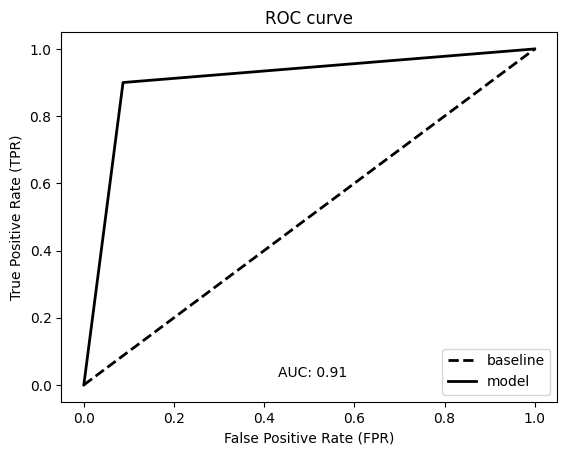

In [16]:
from sklearn.metrics import auc, roc_curve

def plot_roc(y_test, pred, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    ax.plot(
    [0, 1], [0, 1], color='black', lw=2,
    linestyle='--', label='baseline'
    )
    ax.plot(fpr, tpr, color='black', lw=2, label='model')
    ax.legend(loc='lower right')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
    return ax

plot_roc(y_test, pred)

e. Create a confusion matrix using the confusion_matrix_visual() function from the ml_utils.classification module.

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

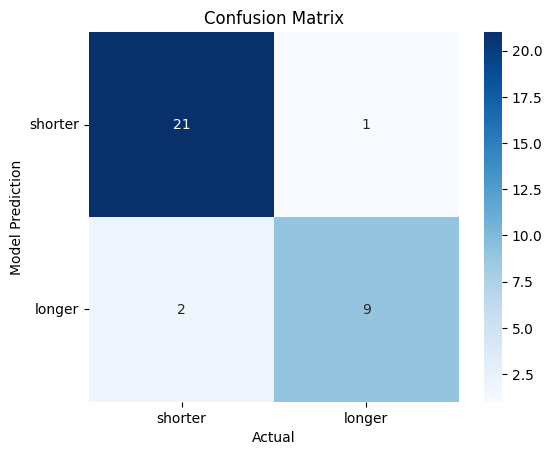

In [18]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    mat = confusion_matrix(y_true, y_pred)
    axes = sns.heatmap(
        mat.T, square=True, annot=True, fmt='d',
        cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
    )
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title(title or 'Confusion Matrix')
    return axes

confusion_matrix_plot(y_test, pred, ['shorter', 'longer'])

In [23]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [22]:
planets.head()

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear
0,326.03,11 Com b,0.231,11 Com b is a brown dwarf-mass companion to th...,RV,2452899.60,15/09/20,1.29,19.40,94.80,Confirmed planets,2008.0
1,516.22,11 UMi b,0.080,11 Ursae Minoris is a star located in the cons...,RV,2452861.04,15/09/20,1.54,11.20,117.63,Confirmed planets,2009.0
2,185.84,14 And b,0.000,14 Andromedae is an evolved star in the conste...,RV,2452861.40,15/09/20,0.83,4.80,0.00,Confirmed planets,2008.0
5,799.50,16 Cygni B b,0.689,16 Cygni is a hierarchical triple system. The ...,RV,2450539.30,15/09/22,1.72,1.77,83.40,Confirmed planets,1996.0
6,993.30,18 Del b,0.080,18 Delphini is a star in the constellation of ...,RV,2451672.00,15/09/23,2.60,10.30,166.10,Confirmed planets,2008.0
